# Hospital Bed Analysis in India

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Number of Government Hospitals and Beds in Rural and Urban Areas.csv")

In [3]:
data.head()

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016


Renaming the unnamed columns in the dataset

In [4]:
data = data.rename(columns = {'Unnamed: 2':'Rural Beds','Unnamed: 4':'Urban Beds'}).reset_index()

In [5]:
data.head()

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on
0,0,NaN,No.,Beds,No.,Beds,NaN
1,1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,3,Assam,1176,10944,50,6198,31.12.2017
4,4,Bihar,930,6083,103,5936,31.12.2016


In [6]:
data = data.iloc[1:,:]

In [7]:
data.dtypes

index               int64
States/UTs         object
Rural hospitals    object
Rural Beds         object
Urban hospitals    object
Urban Beds         object
As on              object
dtype: object

Changing the data-type of the columns for processing

In [8]:
data = data.astype({'States/UTs':str,'Rural hospitals':int,'Rural Beds':int,'Urban hospitals':int,'Urban Beds':int})
data['As on'] = pd.to_datetime(data['As on'])

In [9]:
data.head()

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on
1,1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,2,Arunachal Pradesh*,208,2136,10,268,2017-12-31
3,3,Assam,1176,10944,50,6198,2017-12-31
4,4,Bihar,930,6083,103,5936,2016-12-31
5,5,Chhattisgarh,169,5070,45,4342,2016-01-01


In [10]:
data.dtypes

index                       int64
States/UTs                 object
Rural hospitals             int32
Rural Beds                  int32
Urban hospitals             int32
Urban Beds                  int32
As on              datetime64[ns]
dtype: object

# Data Filtering and Exploratory Data Analysis 

In [11]:
# Calculate total beds in rural and urban areas

data['Total Beds'] = data['Rural Beds'] + data['Urban Beds']

In [12]:
# Remove the * character in the name of states

data['States/UTs'] = data['States/UTs'].str.rstrip('*')  
data.head()

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on,Total Beds
1,1,Andhra Pradesh,193,6480,65,16658,2017-01-01,23138
2,2,Arunachal Pradesh,208,2136,10,268,2017-12-31,2404
3,3,Assam,1176,10944,50,6198,2017-12-31,17142
4,4,Bihar,930,6083,103,5936,2016-12-31,12019
5,5,Chhattisgarh,169,5070,45,4342,2016-01-01,9412


In [13]:
sort_beds = data.sort_values('Total Beds',ascending = False)

In [14]:
sort_beds.head()

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on,Total Beds
37,37,INDIA,19810,279588,3772,431173,NaT,710761
29,29,West Bengal,1272,19684,294,58882,2015-01-01,78566
24,24,Tamil Nadu,692,40179,525,37353,2017-12-31,77532
27,27,Uttar Pradesh,4442,39104,193,37156,2017-12-31,76260
12,12,Karnataka,2471,21072,374,49093,2017-12-31,70165


In [15]:
sort_beds.drop(sort_beds[sort_beds['States/UTs']=='INDIA'].index,inplace = True)

In [16]:
sort_beds.head()

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on,Total Beds
29,29,West Bengal,1272,19684,294,58882,2015-01-01,78566
24,24,Tamil Nadu,692,40179,525,37353,2017-12-31,77532
27,27,Uttar Pradesh,4442,39104,193,37156,2017-12-31,76260
12,12,Karnataka,2471,21072,374,49093,2017-12-31,70165
15,15,Maharashtra,273,12398,438,39048,2015-12-31,51446


In [17]:
sorted_date_wise = sort_beds[sort_beds['As on'] >= '2017-12-31']

In [18]:
sorted_date_wise

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on,Total Beds
24,24,Tamil Nadu,692,40179,525,37353,2017-12-31,77532
27,27,Uttar Pradesh,4442,39104,193,37156,2017-12-31,76260
12,12,Karnataka,2471,21072,374,49093,2017-12-31,70165
25,25,Telangana,802,7668,61,13315,2017-12-31,20983
20,20,Odisha,1655,6339,149,12180,2017-12-31,18519
21,21,Punjab,510,5805,172,12128,2017-12-31,17933
3,3,Assam,1176,10944,50,6198,2017-12-31,17142
9,9,Himachal Pradesh,705,5665,96,6734,2017-12-31,12399
17,17,Meghalaya,143,1970,14,2487,2017-12-31,4457
26,26,Tripura,99,1140,56,3277,2017-12-31,4417


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

x = sorted_date_wise["States/UTs"]
y = sorted_date_wise["Total Beds"]
plt.figure(figsize=(10,5))
plt.title("Number of Beds in top Cities", fontsize = 30, color = 'black', fontstyle = 'italic')
plt.bar(x,y)
plt.xticks(x,rotation=90)
plt.show()

<Figure size 1000x500 with 1 Axes>

In [20]:
data2 = pd.read_csv('Hospitals_and_Beds_statewise.csv')

In [21]:
data2.head()

,Unnamed: 0,PHC,CHC,SDH,DH,Total,Unnamed: 6
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [22]:
data2 = data2.rename(columns = {'Unnamed: 0':'States/UTs','Total':'PHC+CHC+SDH+DH Hospitals', 
                                'Unnamed: 6':'PHC+CHC+SDH+DH Beds'})
data2.head()

,States/UTs,PHC,CHC,SDH,DH,PHC+CHC+SDH+DH Hospitals,PHC+CHC+SDH+DH Beds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
States/UTs                  37 non-null object
PHC                         37 non-null object
CHC                         37 non-null object
SDH                         30 non-null object
DH                          37 non-null object
PHC+CHC+SDH+DH Hospitals    37 non-null object
PHC+CHC+SDH+DH Beds         37 non-null object
dtypes: object(7)
memory usage: 2.1+ KB


In [24]:
# Removing NaN values from SDH column

data2['SDH']=data2['SDH'].fillna(0)
data2.head()

,States/UTs,PHC,CHC,SDH,DH,PHC+CHC+SDH+DH Hospitals,PHC+CHC+SDH+DH Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,0,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [25]:
data2.dtypes

States/UTs                  object
PHC                         object
CHC                         object
SDH                         object
DH                          object
PHC+CHC+SDH+DH Hospitals    object
PHC+CHC+SDH+DH Beds         object
dtype: object

In [26]:
data2.tail()

,States/UTs,PHC,CHC,SDH,DH,PHC+CHC+SDH+DH Hospitals,PHC+CHC+SDH+DH Beds
32,Tripura,114,22,12,9,157,4895
33,Uttar Pradesh,3277,671,0,174,4122,58310
34,Uttarakhand,275,69,19,20,383,6660
35,West Bengal,1374,406,70,55,1905,51163
36,All India,"29,899","5,568","1,255","1,003","37,725","7,39,024"


In [27]:
data2['PHC+CHC+SDH+DH Hospitals'] = data2['PHC+CHC+SDH+DH Hospitals'].str.replace(',','')
data2['PHC+CHC+SDH+DH Beds'] = data2['PHC+CHC+SDH+DH Beds'].str.replace(',','')
data2.tail()

,States/UTs,PHC,CHC,SDH,DH,PHC+CHC+SDH+DH Hospitals,PHC+CHC+SDH+DH Beds
32,Tripura,114,22,12,9,157,4895
33,Uttar Pradesh,3277,671,0,174,4122,58310
34,Uttarakhand,275,69,19,20,383,6660
35,West Bengal,1374,406,70,55,1905,51163
36,All India,"29,899","5,568","1,255","1,003",37725,739024


In [28]:
data2 = data2.astype({'States/UTs':str,'PHC+CHC+SDH+DH Hospitals':int, 'PHC+CHC+SDH+DH Beds':int})

In [29]:
data2.dtypes

States/UTs                  object
PHC                         object
CHC                         object
SDH                         object
DH                          object
PHC+CHC+SDH+DH Hospitals     int32
PHC+CHC+SDH+DH Beds          int32
dtype: object

In [30]:
data2 = data2.iloc[:36,:]
data2.tail()

,States/UTs,PHC,CHC,SDH,DH,PHC+CHC+SDH+DH Hospitals,PHC+CHC+SDH+DH Beds
31,Telangana,788,82,47,15,932,17358
32,Tripura,114,22,12,9,157,4895
33,Uttar Pradesh,3277,671,0,174,4122,58310
34,Uttarakhand,275,69,19,20,383,6660
35,West Bengal,1374,406,70,55,1905,51163


In [31]:
data['States/UTs']

1                Andhra Pradesh
2             Arunachal Pradesh
3                         Assam
4                         Bihar
5                  Chhattisgarh
6                           Goa
7                       Gujarat
8                       Haryana
9              Himachal Pradesh
10              Jammu & Kashmir
11                    Jharkhand
12                    Karnataka
13                       Kerala
14               Madhya Pradesh
15                  Maharashtra
16                      Manipur
17                    Meghalaya
18                      Mizoram
19                     Nagaland
20                       Odisha
21                       Punjab
22                    Rajasthan
23                       Sikkim
24                   Tamil Nadu
25                    Telangana
26                      Tripura
27                Uttar Pradesh
28                  Uttarakhand
29                  West Bengal
30    Andaman & Nicobar Islands
31                   Chandigarh
32      

In [32]:
data.drop(data[data['States/UTs'] == 'INDIA'].index, inplace = True)
data.tail()

,index,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on,Total Beds
32,32,Dadra & Nagar Haveli,10,273,1,316,2017-12-31,589
33,33,Daman & Diu,5,240,0,0,2015-12-31,240
34,34,Delhi,0,0,109,24383,2015-01-01,24383
35,35,Lakshadweep,9,300,0,0,2016-01-01,300
36,36,Puducherry,3,96,11,3473,2016-01-01,3569


In [33]:
data2['States/UTs']

0     Andaman & Nicobar Islands
1                Andhra Pradesh
2             Arunachal Pradesh
3                         Assam
4                         Bihar
5                    Chandigarh
6                  Chhattisgarh
7          Dadra & Nagar Haveli
8                   Daman & Diu
9                         Delhi
10                          Goa
11                      Gujarat
12                      Haryana
13             Himachal Pradesh
14              Jammu & Kashmir
15                    Jharkhand
16                    Karnataka
17                       Kerala
18                  Lakshadweep
19               Madhya Pradesh
20                  Maharashtra
21                      Manipur
22                    Meghalaya
23                      Mizoram
24                     Nagaland
25                       Odisha
26                   Puducherry
27                       Punjab
28                    Rajasthan
29                       Sikkim
30                   Tamil Nadu
31      

In [34]:
df = pd.merge(data,data2[['States/UTs','PHC+CHC+SDH+DH Hospitals','PHC+CHC+SDH+DH Beds']], how = 'inner', on = 'States/UTs' )

In [35]:
df.drop(columns={'index'}, inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,States/UTs,Rural hospitals,Rural Beds,Urban hospitals,Urban Beds,As on,Total Beds,PHC+CHC+SDH+DH Hospitals,PHC+CHC+SDH+DH Beds
0,Andhra Pradesh,193,6480,65,16658,2017-01-01,23138,1666,60799
1,Arunachal Pradesh,208,2136,10,268,2017-12-31,2404,199,2320
2,Assam,1176,10944,50,6198,2017-12-31,17142,1220,19115
3,Bihar,930,6083,103,5936,2016-12-31,12019,2146,17796
4,Chhattisgarh,169,5070,45,4342,2016-01-01,9412,1023,14354


In [36]:
databeds = df['Total Beds'].agg('sum')
dataruralhos = df['Rural hospitals'].agg('sum')
dataurbanhos = df['Urban hospitals'].agg('sum')
data2beds = df['PHC+CHC+SDH+DH Beds'].agg('sum')
data2hos = df['PHC+CHC+SDH+DH Hospitals'].agg('sum')

In [37]:
N = df['States/UTs'].count()

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

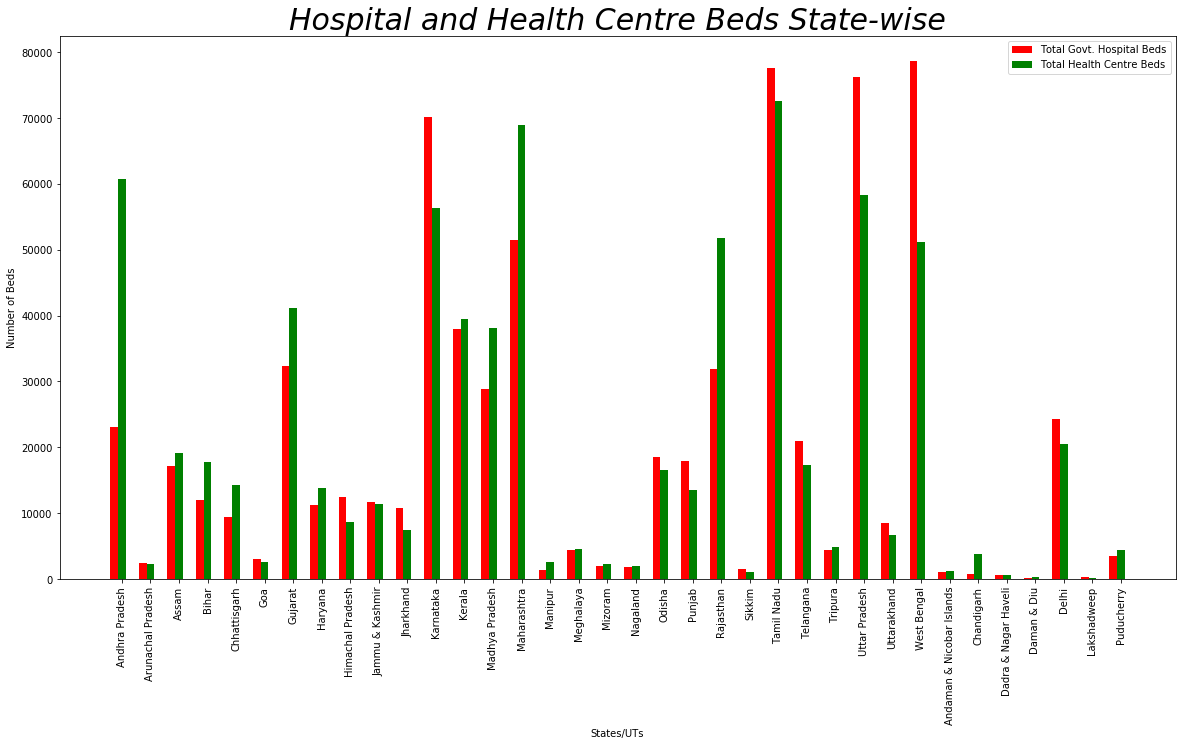

In [39]:

ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)

yvals = df['Total Beds']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = df['PHC+CHC+SDH+DH Beds']
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_xlabel('States/UTs')
ax.set_ylabel('Number of Beds')
ax.set_xticks(ind+width)
ax.set_xticklabels(df['States/UTs'],rotation=90)
ax.legend( (rects1[0], rects2[0]), ('Total Govt. Hospital Beds', 'Total Health Centre Beds') )
plt.title("Hospital and Health Centre Beds State-wise",fontsize = 30, color = 'Black', fontstyle = 'italic')
plt.show()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

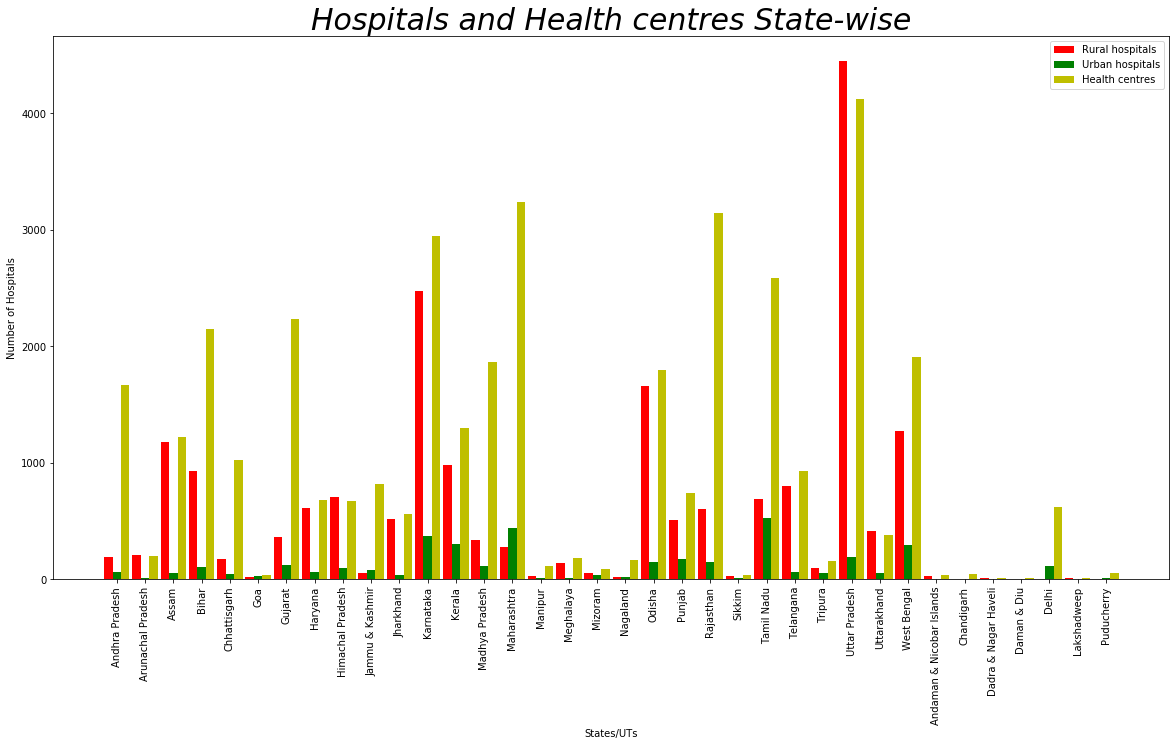

In [41]:
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)

yvals = df['Rural hospitals']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = df['Urban hospitals']
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = df['PHC+CHC+SDH+DH Hospitals']
rects3 = ax.bar(ind+width*2, kvals, width, color='y')

ax.set_ylabel('Number of Hospitals')
ax.set_xlabel('States/UTs')
ax.set_xticks(ind+width)
ax.set_xticklabels(df['States/UTs'],rotation=90)
ax.legend( (rects1[0], rects2[0],rects3[0]), ('Rural hospitals', 'Urban hospitals', 'Health centres') )
plt.title("Hospitals and Health centres State-wise",fontsize = 30, color = 'Black', fontstyle = 'italic')
plt.show()

In [42]:
ayushdf = pd.read_csv('AYUSHHospitals.csv')
ayushdf.head()

,Srl no.,State / UT,Number of Hospitals,Unnamed: 3,Unnamed: 4,Unnamed: 5,Number of Beds,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,Govt.,Local Body,Others,Total,Govt.,Local Body,Others,Total
1,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
2,1,Andhra Pradesh,8,0,0,8,365,0,0,365
3,2,Arunachal Pradesh,11,0,1,12,100,0,25,125
4,3,Assam,4,0,0,4,205,0,0,205


In [43]:
ayushdf = ayushdf.rename(columns = {'Unnamed: 3':'Local Body','Unnamed: 4':'Others','Unnamed: 5':'Total Hospitals',
                                   'Unnamed: 7':'Local Body','Unnamed: 8':'Others','Unnamed: 9':'Total Beds'})
ayushdf = ayushdf.drop(columns = {'Srl no.'})
#ayushdf = ayushdf.drop(columns = {'level_0'})
ayushdf.head()

,State / UT,Number of Hospitals,Local Body,Others,Total Hospitals,Number of Beds,Local Body,Others,Total Beds
0,NaN,Govt.,Local Body,Others,Total,Govt.,Local Body,Others,Total
1,-2,-3,-4,-5,-6,-7,-8,-9,-10
2,Andhra Pradesh,8,0,0,8,365,0,0,365
3,Arunachal Pradesh,11,0,1,12,100,0,25,125
4,Assam,4,0,0,4,205,0,0,205


In [44]:
ayushdf = ayushdf.iloc[2:-5,:].reset_index(drop = True)
ayushdf.head()

,State / UT,Number of Hospitals,Local Body,Others,Total Hospitals,Number of Beds,Local Body,Others,Total Beds
0,Andhra Pradesh,8,0,0,8,365,0,0,365
1,Arunachal Pradesh,11,0,1,12,100,0,25,125
2,Assam,4,0,0,4,205,0,0,205
3,Bihar,8,0,0,8,950,0,0,950
4,Chhattisgarh,7,0,8,15,370,0,470,840


In [45]:
ayushdf.tail()

,State / UT,Number of Hospitals,Local Body,Others,Total Hospitals,Number of Beds,Local Body,Others,Total Beds
31,Dadra &Nagar Haveli,0,0,0,0,0,0,0,0
32,Daman &Diu,2,0,0,2,20,0,0,20
33,Lakshdweep,0,0,0,0,0,0,0,0
34,Puducherry,0,0,0,0,0,0,0,0
35,Telangana,20,0,0,20,841,0,0,841


In [46]:
ayushdf = ayushdf.astype({'State / UT':str,'Total Hospitals':int,'Total Beds':int})

In [47]:
import numpy as np
corr = np.corrcoef(ayushdf['Total Hospitals'], ayushdf['Total Beds'])
corr

array([[1.        , 0.68278008],
       [0.68278008, 1.        ]])

In [48]:
ayushbeds = ayushdf['Total Beds'].agg('sum')
ayushhos = ayushdf['Total Hospitals'].agg('sum')

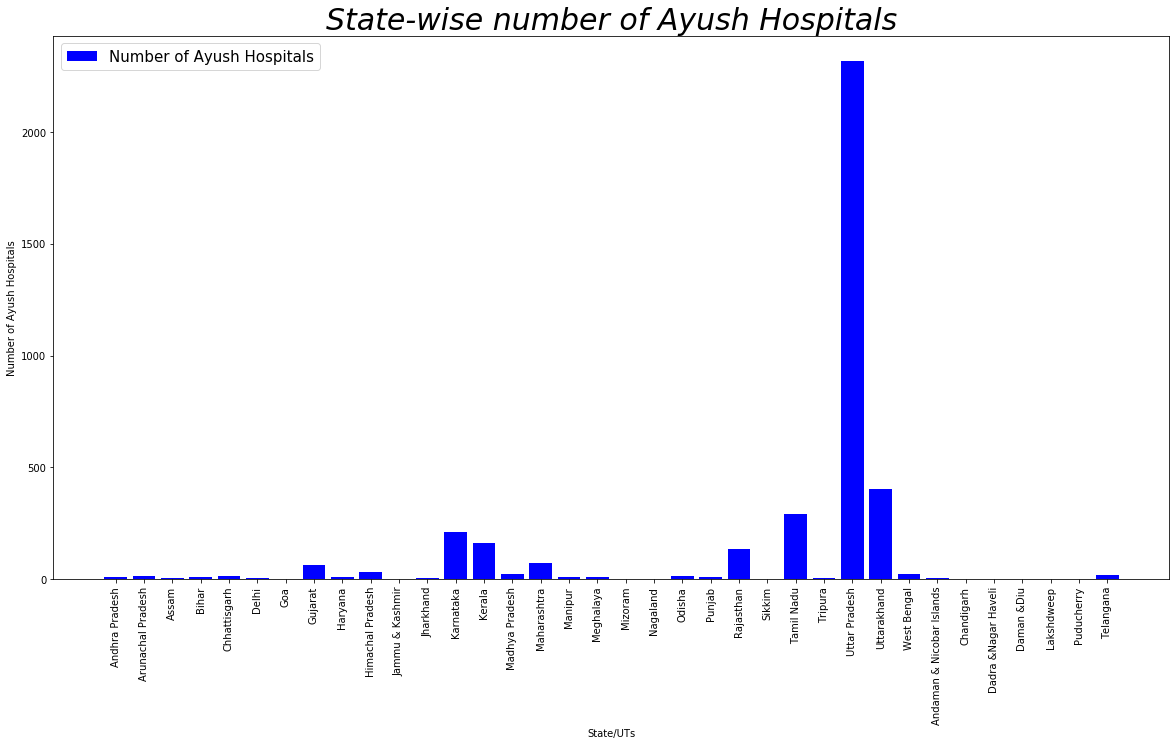

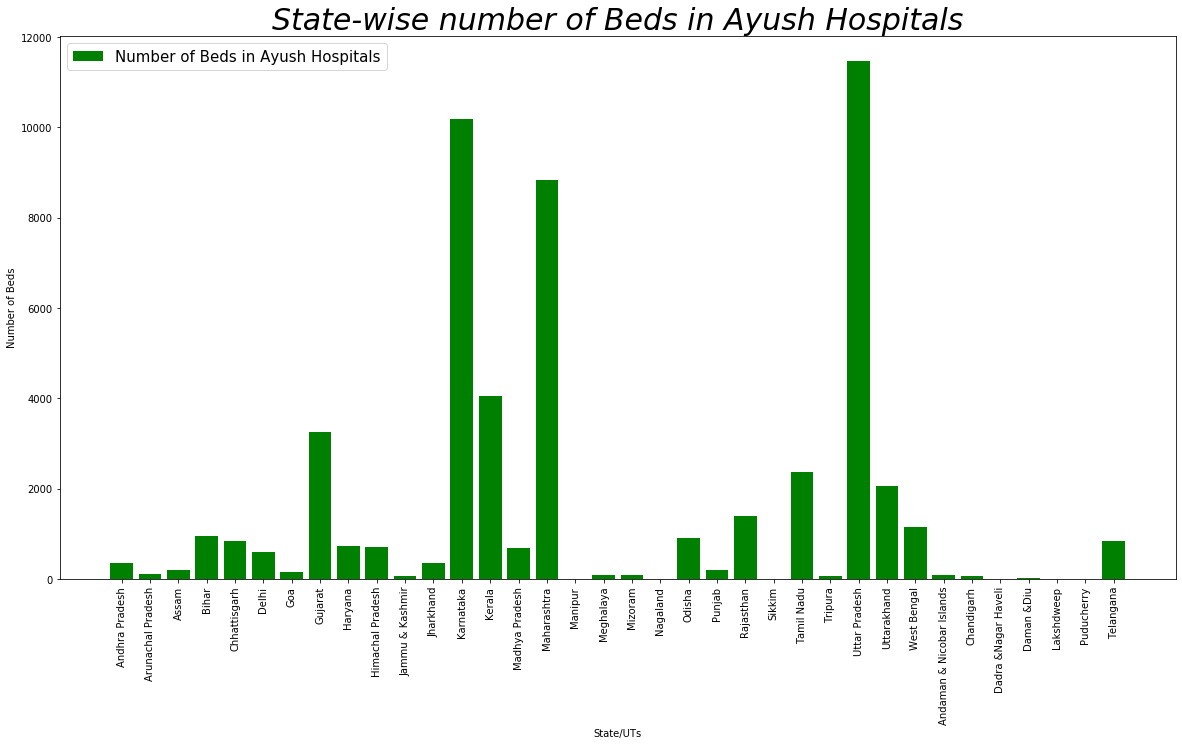

[Text(0, 0.5, 'Hospitals'), Text(0, 1.5, 'Beds')]

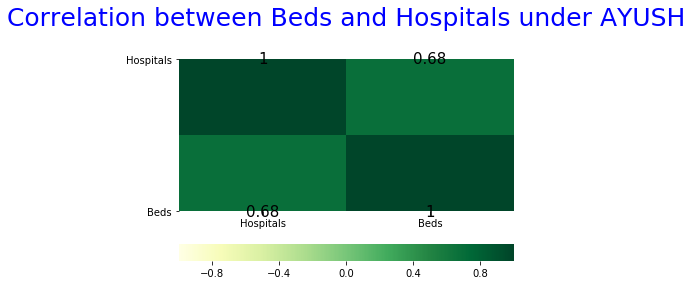

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=[20,10])
plt.title('State-wise number of Ayush Hospitals',fontsize = 30, fontstyle = 'italic')
plt.bar(ayushdf['State / UT'], ayushdf['Total Hospitals'],color = 'b', label = 'Number of Ayush Hospitals')
plt.xticks(ayushdf['State / UT'], rotation = 90)
plt.xlabel('State/UTs')
plt.ylabel('Number of Ayush Hospitals')
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()

plt.figure(figsize=[20,10])
plt.title('State-wise number of Beds in Ayush Hospitals',fontsize = 30, fontstyle = 'italic')
plt.bar(ayushdf['State / UT'], ayushdf['Total Beds'], color = 'g', label = 'Number of Beds in Ayush Hospitals')
plt.xticks(ayushdf['State / UT'], rotation = 90)
plt.xlabel('State/UTs')
plt.ylabel('Number of Beds')
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()


plt.title('Correlation between Beds and Hospitals under AYUSH\n', fontsize = 25,color = 'blue')
ax = sns.heatmap(
    corr, 
    annot = True,
    annot_kws = {'size':15,'color':'black'},
    vmin=-1, vmax=1, center=0,
    cmap = 'YlGn',
    #cmap=sns.diverging_palette(20, 220, n=200),
    cbar_kws = {'orientation':'horizontal'}
    #square=True
)
ax.set_xticklabels(['Hospitals','Beds'])
ax.set_yticklabels(['Hospitals','Beds'], rotation = 360)

In [50]:
esicdf = pd.read_csv('Employees State Insurance Corporation .csv')

In [51]:
esicdf.head()

,Employees State Insurance Corporation Hospitals and beds (as on 31.03.2017),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,S. No.,States /UTs,Total No. of Hospital,Total No. of Beds
1,1,Andhra Pradesh,5,345
2,2,Assam,1,75
3,3,Bihar,3,50
4,4,Chandigarh [Adm.],1,70


In [52]:
esicdf = esicdf.rename(columns = {'Employees State Insurance Corporation Hospitals and beds (as on 31.03.2017)':'SL.NO.',
                                  'Unnamed: 1':'State/UTs','Unnamed: 2':'Total Hospitals', 'Unnamed: 3':'Total Beds'})
esicdf.head()

,SL.NO.,State/UTs,Total Hospitals,Total Beds
0,S. No.,States /UTs,Total No. of Hospital,Total No. of Beds
1,1,Andhra Pradesh,5,345
2,2,Assam,1,75
3,3,Bihar,3,50
4,4,Chandigarh [Adm.],1,70


In [53]:
esicdf.tail()

,SL.NO.,State/UTs,Total Hospitals,Total Beds
28,28,Uttarakhand,0,0
29,29,West Bengal,14,3534
30,NaN,Total,151,19765
31,NaN,NaN,NaN,NaN
32,Source: National Health Profile 2018.,NaN,NaN,NaN


In [54]:
esicdf = esicdf.iloc[1:-3,:]
esicdf

,SL.NO.,State/UTs,Total Hospitals,Total Beds
1,1,Andhra Pradesh,5,345
2,2,Assam,1,75
3,3,Bihar,3,50
4,4,Chandigarh [Adm.],1,70
5,5,Chhattisgarh,0,0
6,6,Delhi,4,1416
7,7,Goa,1,15
8,8,Gujarat,12,910
9,9,Himachal Pradesh,2,150
10,10,Haryana,7,781


In [55]:
esicdf = esicdf.astype({'Total Hospitals':int, 'Total Beds':int})
esicbeds = esicdf['Total Beds'].agg('sum')
esichos = esicdf['Total Hospitals'].agg('sum')
esicbeds
esichos

151

In [56]:
defencedf = pd.read_csv('Hospitals and Beds maintained by Ministry of Defence.csv')
defencedf.head()

,S. No.,Name of State,No. of Hospitals,No. of beds
0,1,Assam,8.0,2357.0
1,2,Andhra Pradesh,1.0,306.0
2,3,Andaman & Nicobar Islands,1.0,107.0
3,4,Arunachal Pradesh,1.0,198.0
4,5,Bihar,2.0,348.0


In [57]:
defencedf.tail()

,S. No.,Name of State,No. of Hospitals,No. of beds
26,27,Uttarakhand,5.0,1402.0
27,28,Uttar Pradesh,15.0,4570.0
28,29,West Bengal,7.0,2107.0
29,NaN,Total,133.0,34520.0
30,Source: Ministry of Defence,NaN,NaN,NaN


In [58]:
defencedf = defencedf.iloc[:-1,:]
defencedf

,S. No.,Name of State,No. of Hospitals,No. of beds
0,1,Assam,8.0,2357.0
1,2,Andhra Pradesh,1.0,306.0
2,3,Andaman & Nicobar Islands,1.0,107.0
3,4,Arunachal Pradesh,1.0,198.0
4,5,Bihar,2.0,348.0
5,6,Delhi,2.0,1993.0
6,7,Goa,2.0,175.0
7,8,Gujarat,5.0,666.0
8,9,Haryana,3.0,1458.0
9,10,Himachal Pradesh,6.0,699.0


In [59]:
defencedf = defencedf.astype({'No. of Hospitals':int, 'No. of beds':int})
defencebeds = defencedf['No. of beds'].agg('sum')
defencehos = defencedf['No. of Hospitals'].agg('sum')
defencebeds
defencehos
defencedf.head()

,S. No.,Name of State,No. of Hospitals,No. of beds
0,1,Assam,8,2357
1,2,Andhra Pradesh,1,306
2,3,Andaman & Nicobar Islands,1,107
3,4,Arunachal Pradesh,1,198
4,5,Bihar,2,348


In [60]:
raildf = pd.read_csv('Hospitals and Beds maintained by Railways.csv')
raildf.head()

,Number of Hospitals and beds in Railways (as on 21/03/2018),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,S.No.,Zone / PU,Total No. of Hospitals,Total No. of Indoor Beds
1,1,Central Railway,11,1164
2,2,Eastern Railway,8,1587
3,3,East central Railway,9,819
4,4,East coast Railway,4,339


In [61]:
raildf = raildf.rename(columns = {'Number of Hospitals and beds in Railways (as on 21/03/2018)':'SL.NO.',
                                  'Unnamed: 1':'Zone/PU','Unnamed: 2':'Total Hospitals', 'Unnamed: 3':'Total Beds'})
raildf.head()

,SL.NO.,Zone/PU,Total Hospitals,Total Beds
0,S.No.,Zone / PU,Total No. of Hospitals,Total No. of Indoor Beds
1,1,Central Railway,11,1164
2,2,Eastern Railway,8,1587
3,3,East central Railway,9,819
4,4,East coast Railway,4,339


In [62]:
raildf = raildf.iloc[1:-1,:]
raildf

,SL.NO.,Zone/PU,Total Hospitals,Total Beds
1,1,Central Railway,11,1164
2,2,Eastern Railway,8,1587
3,3,East central Railway,9,819
4,4,East coast Railway,4,339
5,5,Northern Railway,9,1101
6,6,North Central Railway,5,586
7,7,North East Railway,6,927
8,8,North East Frontier Railway,10,1107
9,9,North Western Railway,8,584
10,10,Southern Railway,10,1131


In [63]:
raildf = raildf.astype({'Total Hospitals':int, 'Total Beds':int})
railbeds = raildf['Total Beds'].agg('sum')
railhos = raildf['Total Hospitals'].agg('sum')
railbeds
railhos

126

In [64]:
aggbeds = pd.DataFrame({'Name of areas':['Govt Hospitals', 'Health Centre', 'Ayush Hospital', 'Employees State Insurance Hospital',
                                        'Defence Hospital', 'Railways Hospital'],
                       'Total Beds':[databeds,data2beds,ayushbeds,esicbeds,defencebeds,railbeds]})

agghos = pd.DataFrame({'Name of areas':['Rural Hospital', 'Urban Hospital', 'Health Centre', 'Ayush Hospital', 'Employees State Insurance Hospital',
                                        'Defence Hospital', 'Railways Hospital'],
                       'Total Hospitals':[dataruralhos,dataurbanhos,data2hos,ayushhos,esichos,defencehos,railhos]})
agghos

,Name of areas,Total Hospitals
0,Rural Hospital,19810
1,Urban Hospital,3772
2,Health Centre,37725
3,Ayush Hospital,3893
4,Employees State Insurance Hospital,151
5,Defence Hospital,266
6,Railways Hospital,126


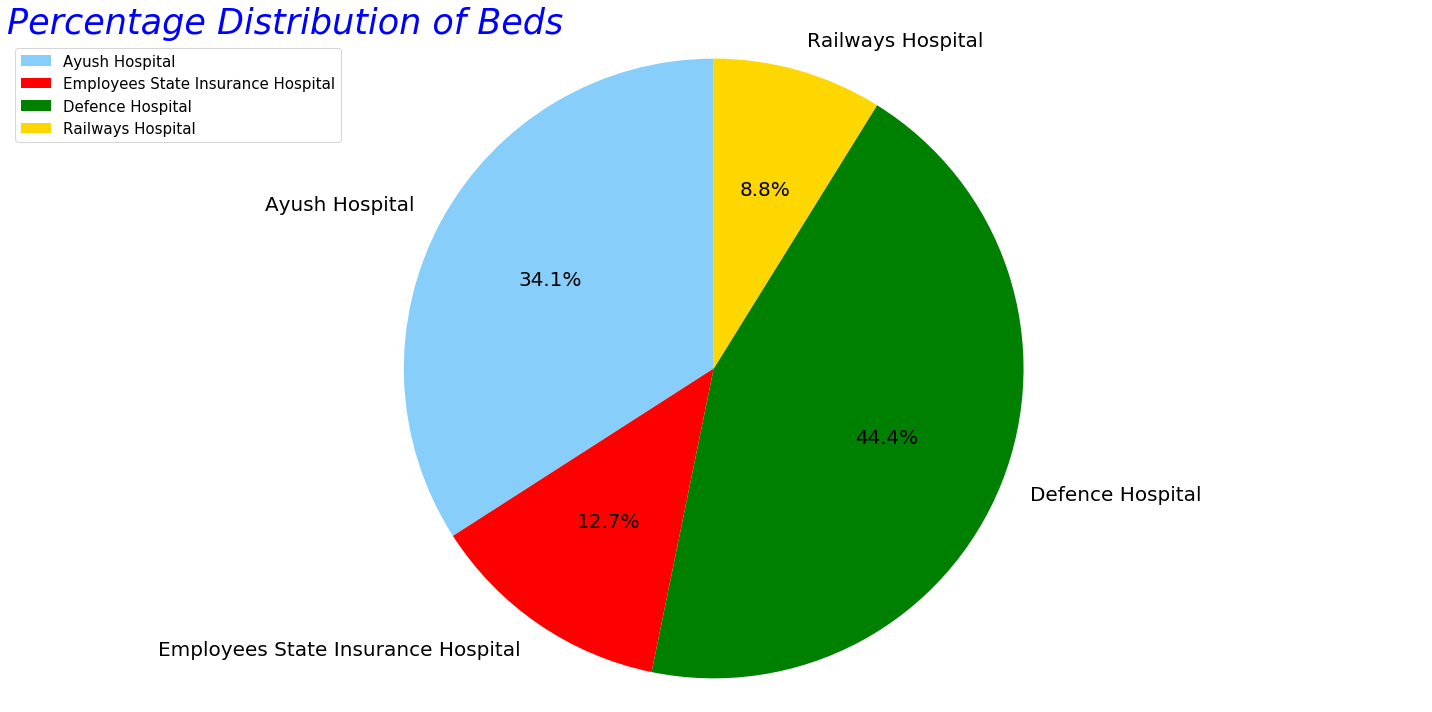

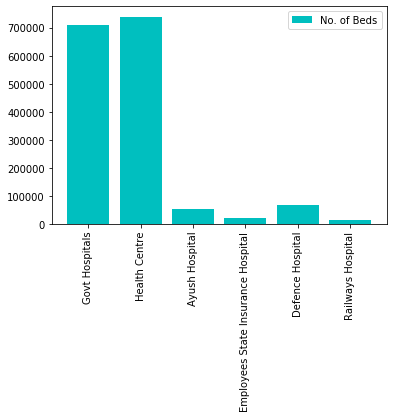

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'red', 'green', 'gold']
explode=(0, 0, 0, 1)
#patches, texts, autotexts = 
plt.pie(
    # using data total beds
    aggbeds.loc[2:,'Total Beds'],
    # with the labels being name of areas
    labels=aggbeds.loc[2:,'Name of areas'],
    # with shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=explode,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    radius = 3000,
    textprops = {'fontsize':20}
    )

#for i in range(len(aggbeds['Total Beds'])):
#    texts[i].set_fontsize(20)

# Title for chart
plt.title('Percentage Distribution of Beds', fontsize = 35, fontstyle = 'italic', loc = 'left',color = 'b')

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()

# View the legend
plt.legend(loc = 'upper left', labels = aggbeds.loc[2:,'Name of areas'], fontsize = 15)
plt.show()

plt.bar(aggbeds['Name of areas'], aggbeds['Total Beds'], color = 'c', label = 'No. of Beds')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

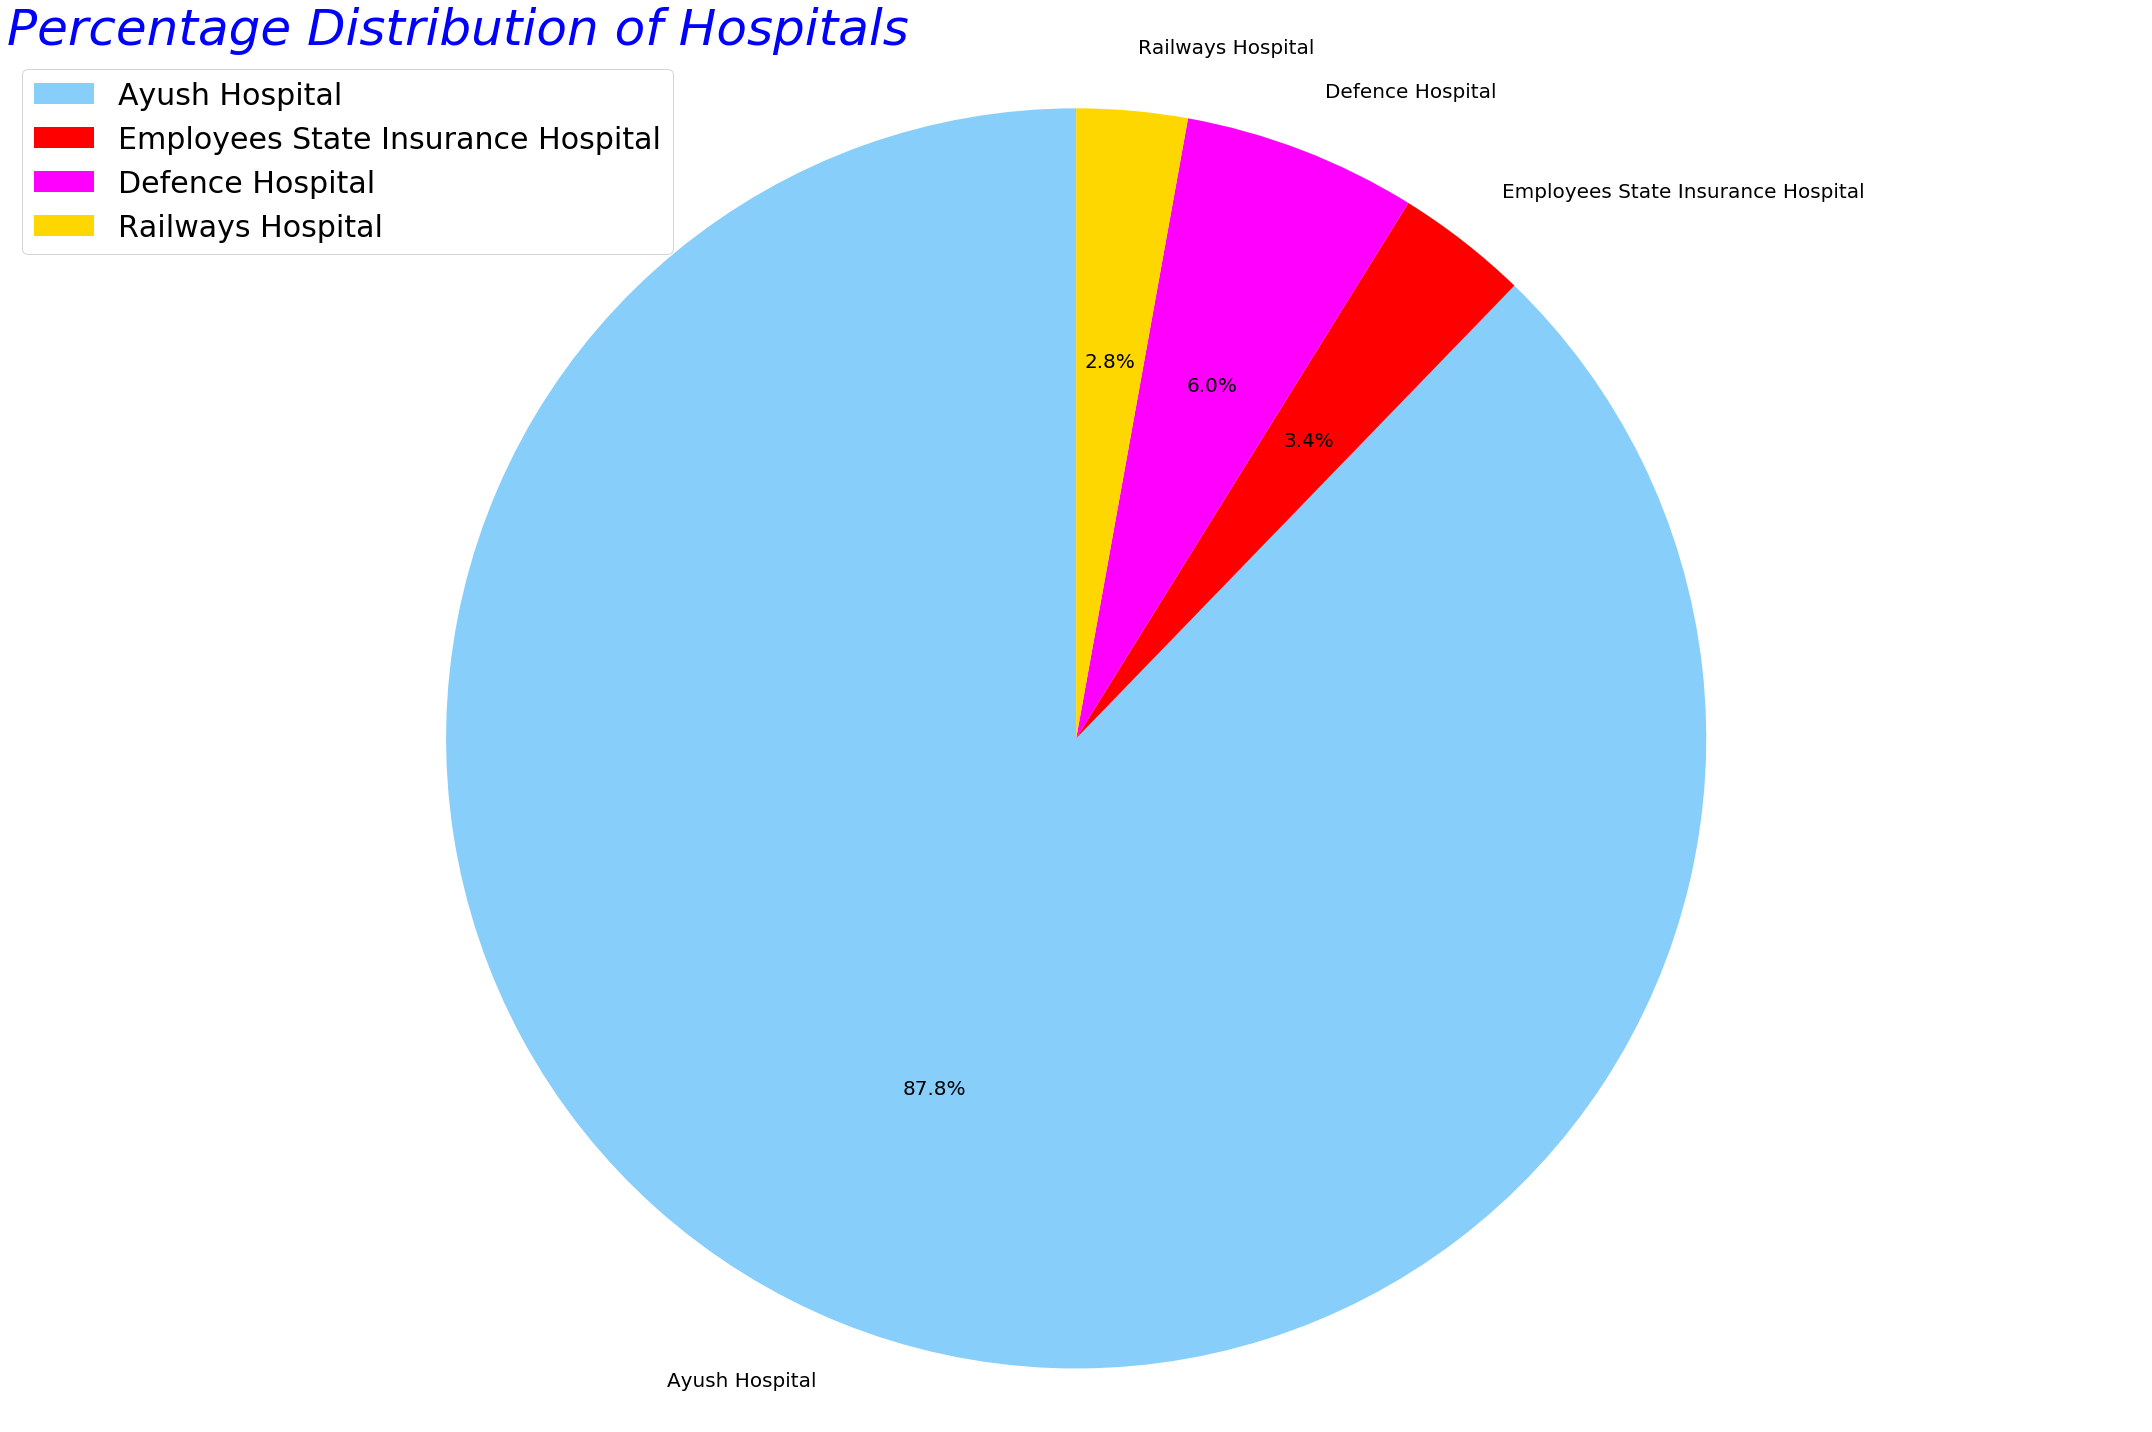

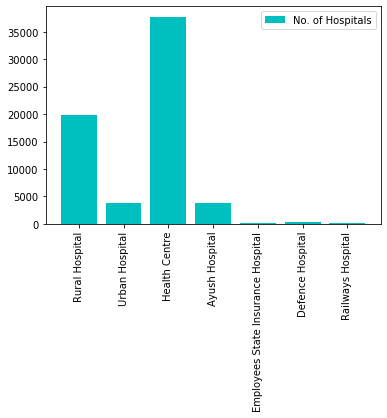

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
colors = ['lightskyblue', 'red', 'magenta', 'gold']
#patches, texts, autotexts = 
plt.pie(
    # using data total beds
    agghos.loc[3:,'Total Hospitals'],
    # with the labels being name of areas
    labels=agghos.loc[3:,'Name of areas'],
    # with shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    radius = 3000,
    textprops = {'fontsize':20}
    )

#for i in range(len(aggbeds['Total Beds'])):
#    texts[i].set_fontsize(20)

# Title for chart
plt.title('Percentage Distribution of Hospitals', fontsize = 50, fontstyle = 'italic', loc = 'left',color = 'b')

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()

# View the legend
plt.legend(loc = 'upper left', labels = agghos.loc[3:,'Name of areas'], fontsize = 30)
plt.show()

plt.bar(agghos['Name of areas'], agghos['Total Hospitals'], color = 'c', label = 'No. of Hospitals')
plt.legend()
plt.xticks(rotation = 90)
plt.show()